In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [2]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Exercício 1
Treine um LinearSVC em um conjunto de dados linearmente separável. Depois, treine o SVC e um SGDClassifies no mesmo conjunto de dados. Veja se você consegue fazer com que produzem aproxidamente o mesmo resultado

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
feature_index = [0, 1]
X = iris.data[:,feature_index]
y = iris.target

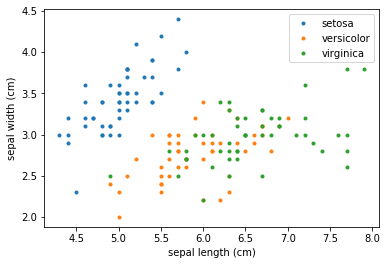

In [6]:
for target, target_names in zip(np.unique(y), iris.target_names):
    plt.plot(*X[y == target].T, '.', label=target_names)
plt.xlabel(iris.feature_names[feature_index[0]])
plt.ylabel(iris.feature_names[feature_index[1]])
plt.legend()
plt.show()

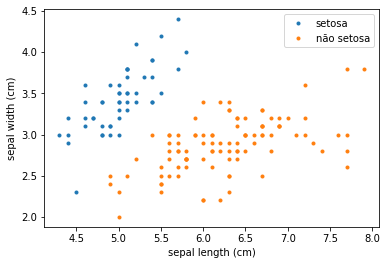

In [7]:
y = (iris['target'] == 0).astype('i')

plt.plot(*X[y == 1].T, '.', label='setosa')
plt.plot(*X[y == 0].T, '.', label='não setosa')
plt.xlabel(iris.feature_names[feature_index[0]])
plt.ylabel(iris.feature_names[feature_index[1]])
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import cross_validate

In [9]:
linear_svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LinearSVC(C=1, loss='hinge'))
])
cross_validate(linear_svc_clf, X, y)

{'fit_time': array([0.0022347 , 0.00136447, 0.00094676, 0.00113106, 0.0009079 ]),
 'score_time': array([0.00055361, 0.00037241, 0.00033975, 0.00032997, 0.00028729]),
 'test_score': array([1.        , 1.        , 1.        , 1.        , 0.96666667])}

In [10]:
svc_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(C=1, kernel='linear'))
])
cross_validate(svc_clf, X, y)

{'fit_time': array([0.00206137, 0.00091004, 0.00076914, 0.00081182, 0.0008111 ]),
 'score_time': array([0.00038147, 0.00043607, 0.00031233, 0.00031304, 0.00029707]),
 'test_score': array([1.        , 1.        , 1.        , 1.        , 0.96666667])}

In [11]:
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SGDClassifier(loss='hinge', alpha=1/100)) # C * m = 1 * 100
])
cross_validate(sgd_clf, X, y)

{'fit_time': array([0.00310159, 0.00135922, 0.00110722, 0.00085354, 0.00160217]),
 'score_time': array([0.00089622, 0.00040984, 0.00030589, 0.00027204, 0.0007019 ]),
 'test_score': array([1.        , 1.        , 1.        , 1.        , 0.96666667])}

# Exercício 2
Treine um classificador SVM no conjunto de dados MNIST. Uma vez que os classificadores SVM são classificadores binários, você precisará utilziar um contra todos para classificar todos os 10 dígitos. Ajuste os hiperâmetros utilizndo pequenos conjuntos de validação para acelerar o processo. Qual acurácia você pode alcançar?

In [12]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

In [13]:
X, y = mnist["data"], mnist["target"]
size_train = 10000
size = 10000 + size_train
X_train, X_test, y_train, y_test = X[:size_train], X[size_train:size], y[:size_train], y[size_train:size]

In [14]:
linear_svc_clf = SVC()
cross_validate(linear_svc_clf, X_train, y_train)

{'fit_time': array([9.40299296, 8.29959512, 7.83587074, 7.94044948, 7.6002202 ]),
 'score_time': array([3.90930915, 3.61674452, 3.71229482, 3.58682394, 3.6653502 ]),
 'test_score': array([0.957 , 0.9695, 0.9625, 0.957 , 0.9505])}

In [15]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import norm, uniform
param_grid = [
    {
        'C': uniform(loc=1, scale=150),
        'kernel': ['linear']
    },
    {
        'C': uniform(loc=1, scale=150),
        'kernel': ['poly'],
        'degree': np.arange(2, 8)
    },
    {
        'kernel': ['rbf'],
        'C': uniform(loc=1, scale=150)
    }
]

linear_svc_clf = SVC()

grid_search = RandomizedSearchCV(linear_svc_clf, param_grid, cv=5, scoring='balanced_accuracy')

grid_search.fit(X_train, y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [ ]:
grid_search.best_estimator_.score(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)